# Level 03 
###  Task Predictive Modeling


In [7]:
# importing important libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r"E:\Project_2024\Internship_Oppurtunity_tasks\Cognifyz_Technologies\Restuarant_Dataset.csv", encoding="utf-8")

In [9]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


### Data Cleaning
### From the previous task we know that there are no null values in the dataset. The dataset contains special symbol values which needs to be removed. 

In [16]:
corrupt_rows = df[df.apply(lambda x : x.astype(str).str.contains("�").any(), axis=1)]
print(corrupt_rows)

      Restaurant ID           Restaurant Name  Country Code       City  \
22          6600681               Chez Michou            30  Bras�_lia   
23          6601005       Caf�� Daniel Briand            30  Bras�_lia   
24          6600292  Casa do Biscoito Mineiro            30  Bras�_lia   
25          6600441                     Maori            30  Bras�_lia   
26          6600970            Pizza �� Bessa            30  Bras�_lia   
...             ...                       ...           ...        ...   
9546        5915730               Naml۱ Gurme           208  ��stanbul   
9547        5908749              Ceviz A��ac۱           208  ��stanbul   
9548        5915807                     Huqqa           208  ��stanbul   
9549        5916112               A���k Kahve           208  ��stanbul   
9550        5927402  Walter's Coffee Roastery           208  ��stanbul   

                                                Address     Locality  \
22    SCLN, 208, Bloco A, Loja 30, Asa 

### Here there 246 rows out of 9551 rows (entire dataset) which have special symbols which if we replace with blank then the value of column will change.
### For example ��stanbul will be stanbul. Similarly other values as well will not make any sense. 

### These rows are appx 3% of the entire dataset. Hence I will be removing the rows instead of replacing the special symbol with blank.

In [18]:
df = df[~df.apply(lambda x : x.astype(str).str.contains("�").any(), axis=1)]


In [19]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 9305


In [20]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",...,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",...,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,...,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203
9515,5801321,Cafe Beverly,191,Colombo,"475/C, Sri Jayawardenapura Mawatha, Welikada, ...","Rajagiriya, Colombo","Rajagiriya, Colombo, Colombo",79.902941,6.906815,"Continental, American",...,Sri Lankan Rupee(LKR),No,No,No,No,3,4.1,Green,Very Good,58
9516,5800612,Burger's King,191,Colombo,"1, Vellons Passage, Slave Island, Colombo 02","Slave Island, Colombo 02","Slave Island, Colombo 02, Colombo",79.850748,6.923933,Fast Food,...,Sri Lankan Rupee(LKR),No,No,No,No,2,4.1,Green,Very Good,199


### Task 01 Question 01 
### Build a regression model to predict the aggregate rating of a restaurant based on available features.
### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics

In [23]:
#importing dataset required for creating model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [30]:
#Converting categorical values to numeric using one hot encoding
df = pd.get_dummies(df,columns=['Has Table booking','Has Online delivery'], drop_first=True)

In [32]:
#Select features and target variable 
features = ['Average Cost for two','Votes','Price range','Has Table booking_Yes','Has Online delivery_Yes']
target = 'Aggregate rating'

X=df[features]
Y=df[target]

In [34]:
### Spliting the datasets intp train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Task 01 Question 02 
### Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance

In [37]:
# Linear Regression 
rg_model = LinearRegression().fit(X_train, Y_train)

In [39]:
# Checking accuracy of derived model 
rg_model.score(X_train, Y_train)


0.26017216251816633

In [41]:
rg_model.score(X_test, Y_test)

0.24204183519650713

In [43]:
#checking error in pred
pred = rg_model.predict(X_test)


In [45]:
mean_squared_error(Y_test,pred)

1.7331627354103059

In [47]:
#Decision Tree model 
dc_model = DecisionTreeRegressor().fit(X_train, Y_train)

In [49]:
#checking accuracy of derived model 
dc_model.score(X_train,Y_train)

0.9907080592406209

In [51]:
dc_model.score(X_test, Y_test)

0.9147617221076848

In [53]:
#checking error in pred
pred_dc = dc_model.predict(X_test)
mean_squared_error(Y_test,pred_dc)

0.1949076000940099

In [55]:
#Random Forest model 
Rd_model = RandomForestRegressor().fit(X_train,Y_train)

In [56]:
#Checking accuracy of derived model
Rd_model.score(X_train, Y_train)

0.9851273001967351

In [57]:
Rd_model.score(X_test,Y_test)

0.94458501835362

In [58]:
#checking error in pred
pred_rd = Rd_model.predict(X_test)
mean_squared_error(Y_test,pred_rd)

0.12671303725298874

# Insights from the above model predictions
1. Linear Regression
Training Score (R²): 0.2601
Test Score (R²): 0.2420
Mean Squared Error (MSE): 1.7331
2. Decision Tree Regressor
Training Score (R²): 0.9907
Test Score (R²): 0.9148
Mean Squared Error (MSE): 0.1947
3. Random Forest Regressor
Training Score (R²): 0.9851
Test Score (R²): 0.9450
Mean Squared Error (MSE): 0.1256

### Here's a comparison of the three models based on their training accuracy, test accuracy, and mean squared error (MSE):
### Observations:
Linear Regression has the lowest accuracy (both train and test) and the highest MSE, indicating it does not fit the data well.
Decision Tree has a very high training accuracy but a slightly lower test accuracy, suggesting it overfits the training data.
Random Forest performs better than Decision Tree, as it generalizes well with a high test accuracy (0.9450) and the lowest MSE (0.1256).

### Conclusion:
Best Model: Random Forest Regressor as it has the highest test accuracy and lowest error.
Overfitting Risk: Decision Tree overfits, while Random Forest mitigates this issue.
Underfitting: Linear Regression underfits as it has low accuracy.
Thus, Random Forest Regressor is the best model among the three for this dataset

### Task 02  Task: Customer Preference Analysis

### Task 02 Q1
###  Analyze the relationship between the type of cuisine and the restaurant's rating.

In [65]:
top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 15 cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]



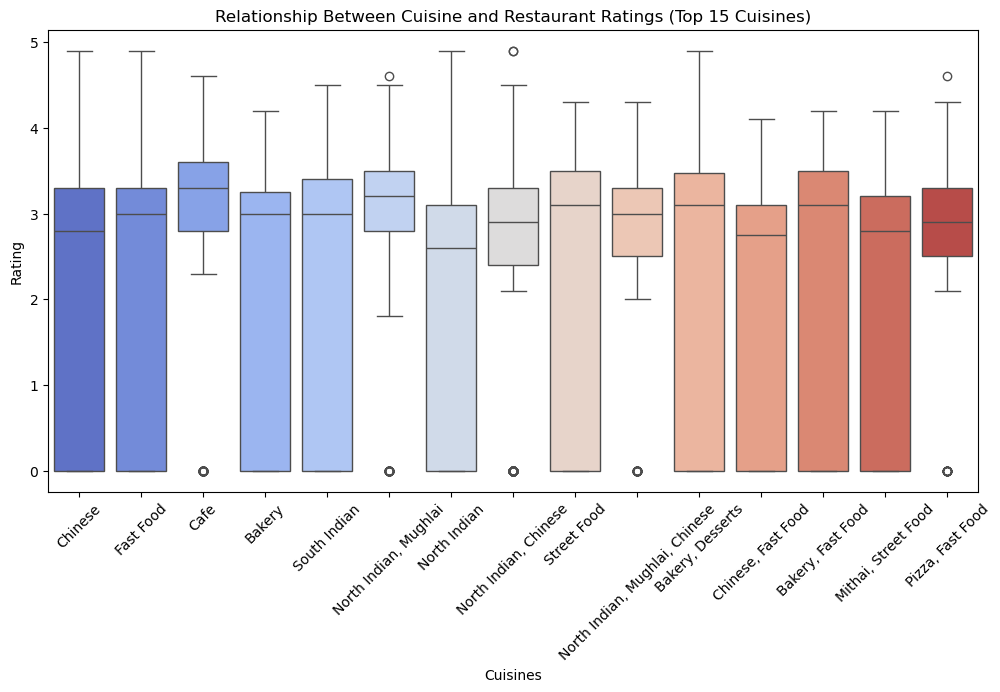

In [111]:
#Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtered,x='Cuisines',y='Aggregate rating',palette='coolwarm')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

### Box plot 
### Box plot have four parts 1. Median Ratings 2. IQR (Interquartile Range) and Rating Speed 3. Whisters 4. Outliers
1. Median Ratings (Central Tendency)

The horizontal line inside each box represents the median rating for each cuisine.
Cuisines with higher median values generally receive better ratings.

2. Interquartile Range (IQR) and Rating Spread

The box represents the middle 50% of ratings (from the 25th percentile to the 75th percentile).
A wider box means higher variability in ratings, while a narrower box indicates consistency.

3. Whiskers (Minimum & Maximum Ratings, Excluding Outliers)

The whiskers extend to the lowest and highest values within 1.5 times the IQR.
Long whiskers indicate a wide range of ratings, suggesting mixed customer opinions.

4. Outliers (Points Outside Whiskers)

Outliers (dots beyond the whiskers) represent restaurants with ratings significantly different from the majority.
A cuisine with many outliers might have inconsistent quality across different restaurants.

Observations:
Some cuisines (e.g., Café, Bakery, North Indian) appear to have higher median ratings, indicating generally good customer reviews.
Some cuisines (e.g., Fast Food, Street Food) have a larger spread, meaning more variation in ratings.
Certain cuisines have low outliers, indicating some restaurants received very low ratings, possibly due to poor service or food quality.

### Task 02 Q2
### Identify the most popular cuisines among customers based on the number of votes.

In [71]:
top_cusinies = df.groupby('Cuisines')['Votes'].sum().nlargest(10)
print("Top cuisines by number of votes")
print(top_cusinies)

Top cuisines by number of votes
Cuisines
North Indian, Mughlai                    53511
North Indian                             46222
North Indian, Chinese                    42011
Cafe                                     27261
Chinese                                  21713
North Indian, Mughlai, Chinese           19945
Fast Food                                17544
South Indian                             16433
Mughlai, North Indian                    15275
European, Mediterranean, North Indian    12541
Name: Votes, dtype: int64


### Task 02 Q3
### Determine if there are any specific cuisines that tend to receive higher ratings

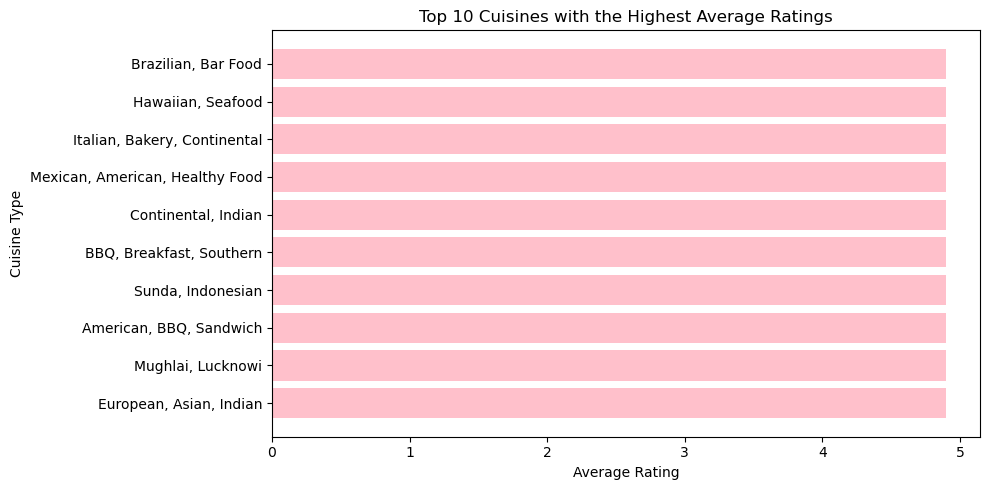

In [74]:
cuisines_rating = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisines_rating = cuisines_rating.sort_values(by='Aggregate rating',ascending=False)

#plotting the values
plt.figure(figsize=(10, 5))
plt.barh(cuisines_rating['Cuisines'][:10], cuisines_rating['Aggregate rating'][:10], color='pink')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

### Insights from Level 03 Task 02 Q2 and Q3
North India, Mughlai are the top voted cuisines. 
European, Mediterranean are the least voted cuisines.

The rating of each cuisines in the chart has an average rating close to 5, which indicates very high customer satisfaction. 


### Task 03 - Data Visualization 
### Q1 Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.)

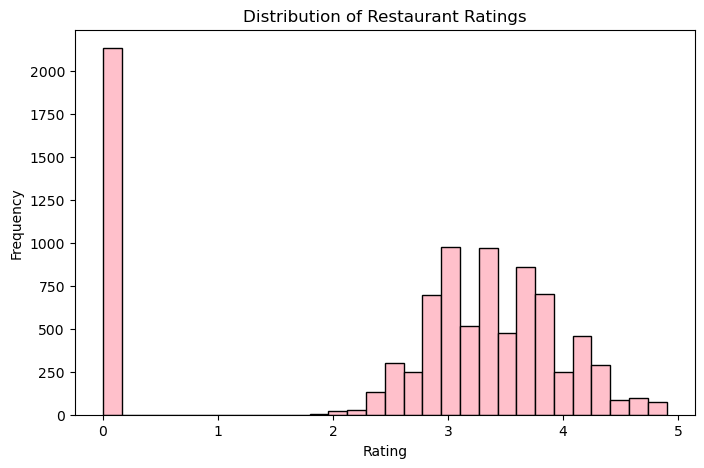

In [78]:
plt.figure(figsize=(8,5))
plt.hist(df['Aggregate rating'], bins=30, color='pink', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

plt.show()

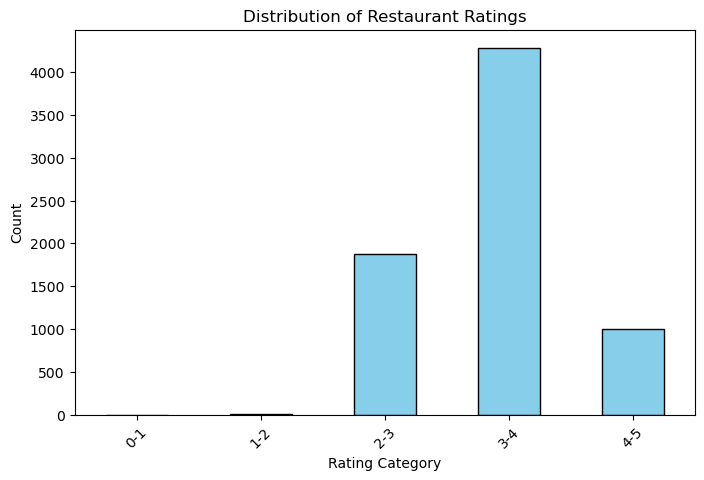

In [80]:
#Using bar plot 

# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

### Q2 Compare the average ratings of different cuisines or cities using appropriate visualizations 


<Figure size 1000x600 with 0 Axes>

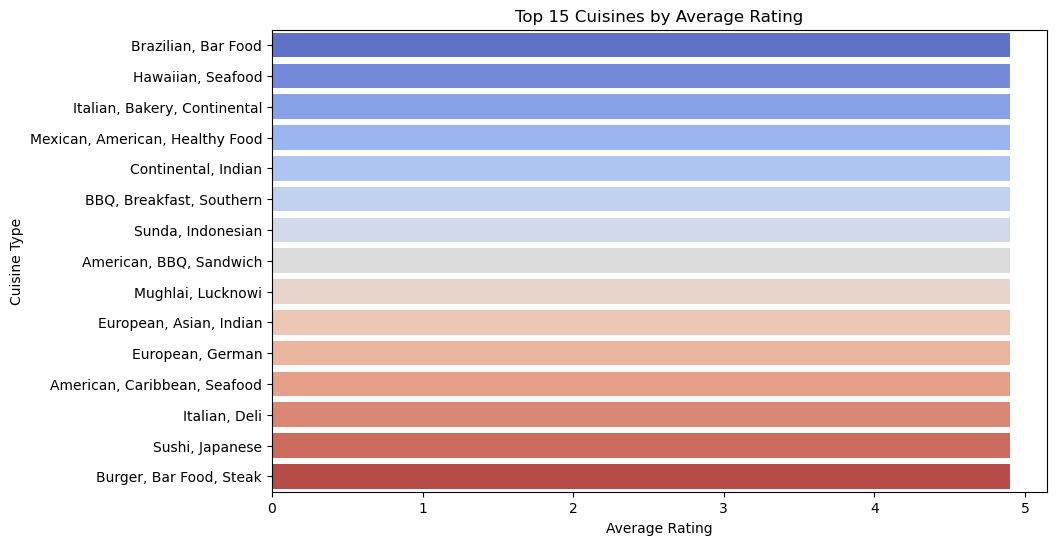

In [87]:
# Bar chat : Average rating by cuisines 
plt.figure(figsize=(10, 6))
cuisine_avg = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(15)  # Top 15 cuisines
sns.barplot(x=cuisine_avg.values, y=cuisine_avg.index, palette='coolwarm')
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Type")
plt.title("Top 15 Cuisines by Average Rating")
plt.show()

## Insights from the above plot 
### Blue shades represent higher rated cuisines, while red shades indicate lower rated ones
### Sushi, Japenese and Burger, Bar Food, Steak have the lowest ratings among the top 15
### Brazilian, Bar Food and Hawaiian Seafood have the highest average ratings close to 5

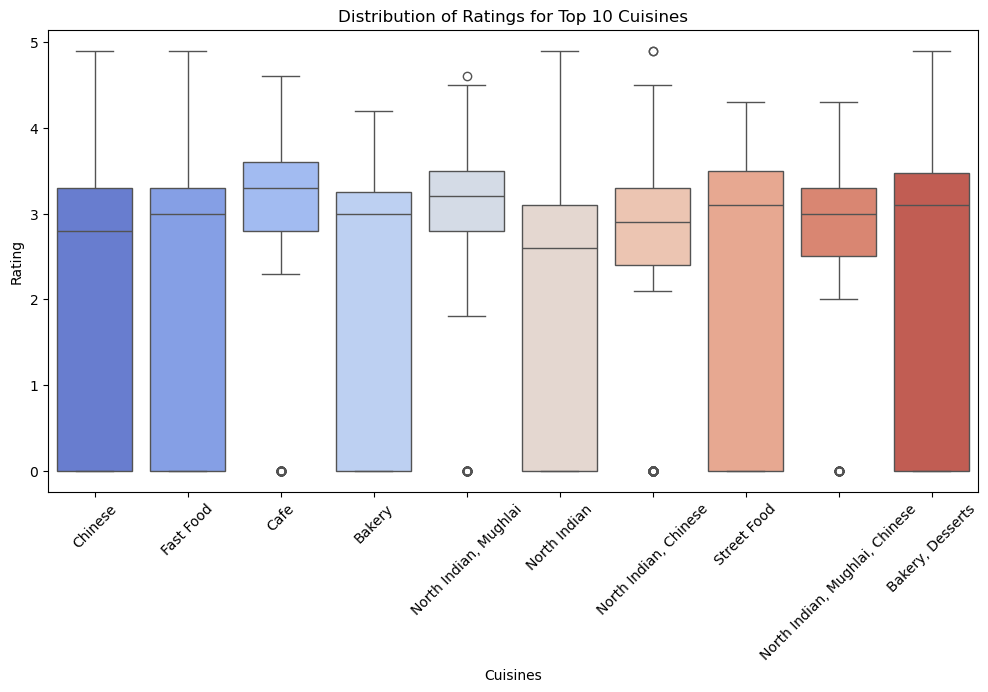

In [89]:
### BOX PLOT: Rating Distributions for Top 10 Cuisines ###
top_cuisines = df['Cuisines'].value_counts().index[:10]  # Select top 10 most common cuisines
df_top = df[df['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_top, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Cuisines")
plt.ylabel("Rating")
plt.title("Distribution of Ratings for Top 10 Cuisines")
plt.show()

<Figure size 1000x600 with 0 Axes>

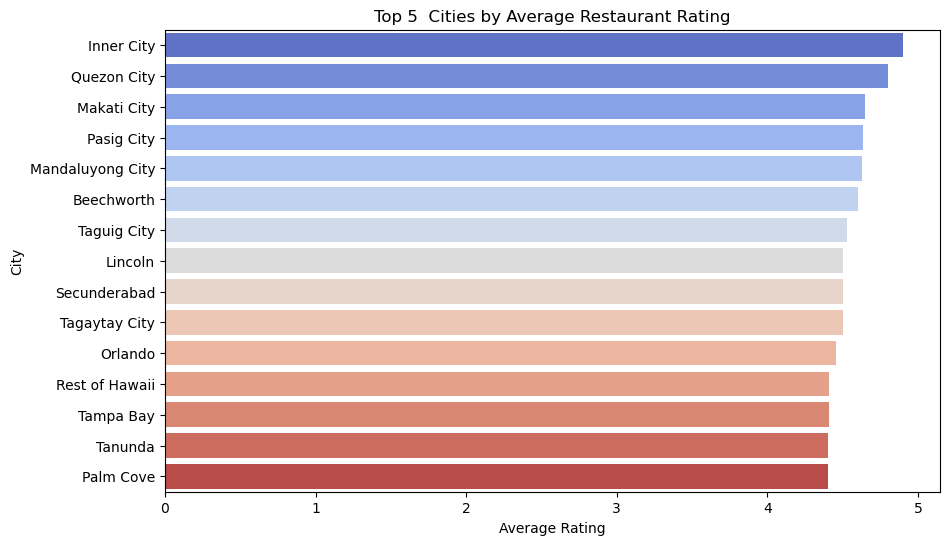

In [93]:
# Analyzing the Cities by Rating 
plt.figure(figsize=(10,6))
city_avg = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=city_avg.values, y=city_avg.index, palette='coolwarm')
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.title("Top 5  Cities by Average Restaurant Rating")
plt.show()

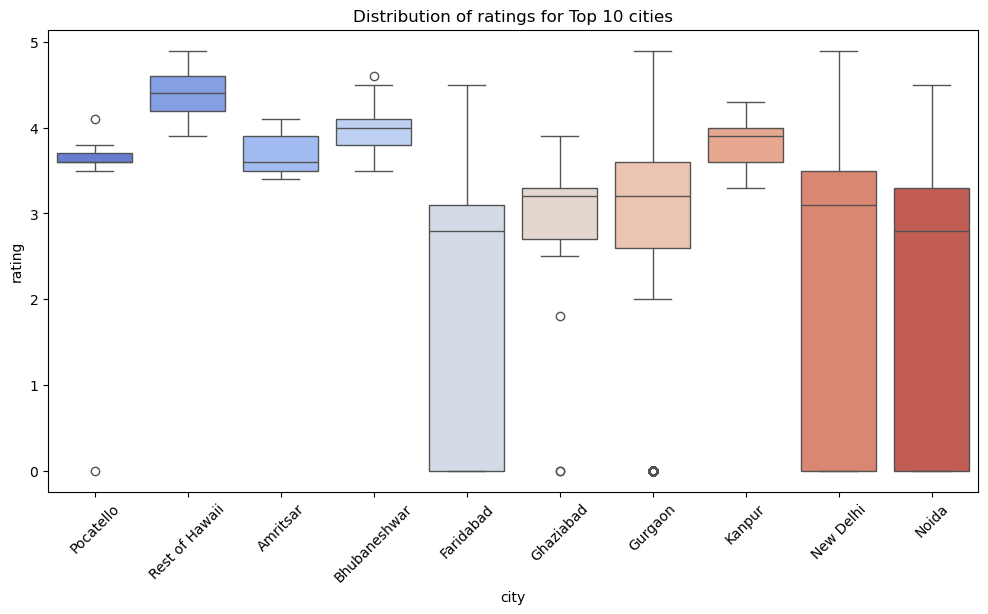

In [97]:
#Box plot for Cities vs Rating 
top_cities = df['City'].value_counts().index[:10]
df_top = df[df['City'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Aggregate rating', data=df_top, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("city")
plt.ylabel("rating")
plt.title("Distribution of ratings for Top 10 cities")
plt.show()

### Q3  Visualize the relationship between various features and the target variable to gain insights.


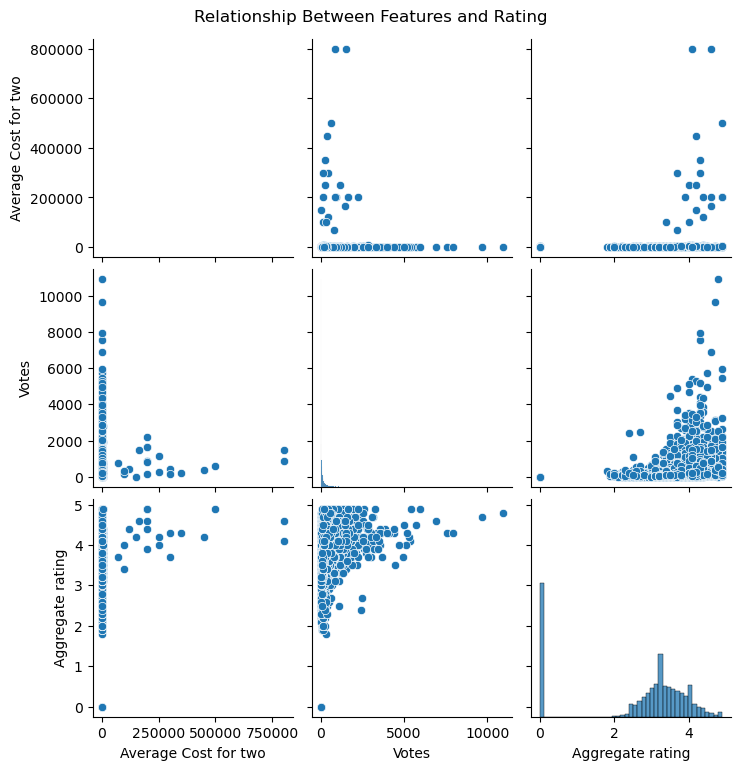

In [103]:
# Visualizing the relationship between various features and the target variable by using pair plot
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Display Chart
plt.show()

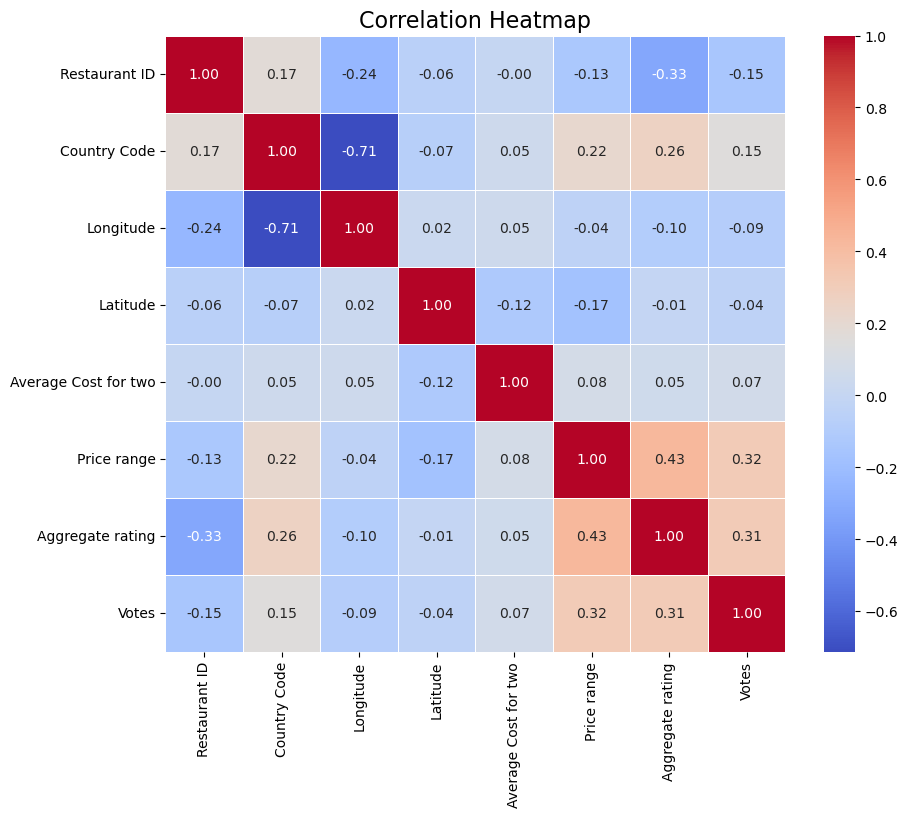

In [109]:
#Corelation matrix 
numerical_df = df.select_dtypes(include=['float64','int64'])

corr_matrix = numerical_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap',fontsize=16)
plt.show()